In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,TruncatedSVD,SparsePCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [2]:
datafile = 'Data/Enzyme_aligned.txt'

enz_names = []
X = []
y = []

with open(datafile,'r') as f:
    for lines in f:
        enz_val = lines.strip('\n').split(',')
        enz_names.append(enz_val[0])
        X.append(list(enz_val[1]))
        y.append(enz_val[2])

In [3]:
smallX = [x[:5] for x in X]

In [4]:
smallXarr = np.array(smallX)

In [5]:
Xarr = np.array(X)

In [6]:
ohe = OneHotEncoder()
ohe.fit(Xarr)


OneHotEncoder()

In [7]:
X_enc = ohe.transform(Xarr).toarray()
y_enc = np.array(y)

In [8]:
lencat = [(ci,lc) for ci,lc in zip(range(len(ohe.categories_)),list(map(len,ohe.categories_)))]

In [9]:
catnummap = {}

currval = 0
nextval = 0

for i,j in lencat:
    nextval += j
    catnummap[i] = list(range(currval,nextval))
    currval=nextval
    

In [10]:
numcatmap = {num:cat for cat,nums in catnummap.items() for num in nums}

In [11]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,chi2

skbest = SelectKBest(score_func=chi2)
skbest.fit(X_enc,y_enc)

SelectKBest(score_func=<function chi2 at 0x2b2c6fead378>)

In [12]:
np.argsort(skbest.scores_)[::-1][:50]

array([ 818,  848,  821, 1032,  797,  420,  805, 1507, 1090,  849,  734,
        864, 1171, 1589,  858,  702, 1461, 1469, 1252,  958, 1519, 1495,
       1103,  437, 1363, 1207,  986, 1499, 1442,  763, 1184, 1483, 1085,
        951,  772,  969, 1320, 1057, 1412,  880, 1529,  979,  960, 1182,
        464, 1313, 1643,  726, 1513,  553])

In [45]:
skbest.scores_[1032]

22.38975817923187

In [15]:
best50pos = []

for idx in np.argsort(skbest.scores_)[::-1][:50]:
    best50pos.append(numcatmap[idx])

In [46]:
best50pos

[236,
 242,
 236,
 290,
 229,
 127,
 233,
 408,
 302,
 242,
 208,
 246,
 321,
 428,
 245,
 200,
 399,
 400,
 351,
 272,
 409,
 406,
 304,
 130,
 379,
 330,
 281,
 407,
 397,
 219,
 323,
 405,
 301,
 271,
 221,
 276,
 364,
 295,
 394,
 251,
 411,
 279,
 272,
 323,
 135,
 363,
 441,
 207,
 409,
 153]

In [16]:
mypos = sorted(set(best50pos))

In [17]:
mypos

[127,
 130,
 135,
 153,
 200,
 207,
 208,
 219,
 221,
 229,
 233,
 236,
 242,
 245,
 246,
 251,
 271,
 272,
 276,
 279,
 281,
 290,
 295,
 301,
 302,
 304,
 321,
 323,
 330,
 351,
 363,
 364,
 379,
 394,
 397,
 399,
 400,
 405,
 406,
 407,
 408,
 409,
 411,
 428,
 441]

In [18]:
len(mypos)

45

In [19]:
with open('Data/BestPosition.txt','w') as f:
    for pos in mypos:
        f.write(str(pos))
        f.write('\n')

In [20]:
ohe.categories_[146]

array(['-', 'K', 'N', 'R', 'S'], dtype='<U1')

In [21]:
Xarr

array([['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ...,
       ['-', '-', 'M', ..., '-', '-', '-'],
       ['-', '-', 'M', ..., '-', '-', '-'],
       ['-', '-', 'M', ..., '-', '-', '-']], dtype='<U1')

In [22]:
X_processed = Xarr[:,mypos]

In [23]:
X_processed

array([['R', 'K', 'L', ..., 'Q', 'A', 'N'],
       ['W', 'K', 'L', ..., 'E', 'G', 'R'],
       ['W', 'G', 'L', ..., 'E', 'S', 'K'],
       ...,
       ['R', 'K', 'L', ..., 'Q', 'G', 'N'],
       ['R', 'K', 'L', ..., 'Q', 'G', 'N'],
       ['R', 'K', 'L', ..., 'Q', 'G', 'N']], dtype='<U1')

In [24]:
y_enc

array(['3', '3', '1', '1', '2', '1', '2', '3', '1', '1', '2', '1', '3',
       '3', '1', '2', '2', '3', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '1', '3', '3',
       '2', '2', '3', '3', '3', '2', '1', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '1', '3', '2', '3', '2', '3',
       '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '3',
       '1', '1', '1', '2', '2', '3', '1', '1', '1', '1', '1', '1', '2',
       '2', '2'], dtype='<U1')

In [25]:
ohe_proc = OneHotEncoder()
ohe_proc.fit(X_processed)

OneHotEncoder()

In [26]:
Xtrain = ohe_proc.transform(X_processed).toarray()

In [27]:
Xtrain

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [28]:
Xtrain.shape

(106, 280)

In [29]:
steps = [('pca',PCA(n_components=35)),('SVM',SVC(C=1,gamma='scale',kernel='rbf'))]
pipe = Pipeline(steps)


In [30]:
pipe.fit(Xtrain,y_enc)

Pipeline(steps=[('pca', PCA(n_components=35)), ('SVM', SVC(C=1))])

In [31]:
ypred = pipe.predict(Xtrain)

In [32]:
accuracy_score(ypred,y_enc)

0.839622641509434

In [33]:
X_processed.shape

(106, 45)

In [34]:
tracc = []
teacc = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y_enc, test_size=0.33, random_state=i)
    oheenc= OneHotEncoder(handle_unknown='ignore')
    oheenc.fit(X_train)
    X_train_e = oheenc.transform(X_train).toarray()
    X_test_e = oheenc.transform(X_test).toarray()
    steps = [('pca',PCA(n_components=35)),('SVM',SVC(C=1,gamma='scale',kernel='rbf'))]
    pipe = Pipeline(steps)
    pipe.fit(X_train_e,y_train)
    ypredtrain = pipe.predict(X_train_e)
    ypredtest = pipe.predict(X_test_e)
    trainacc = accuracy_score(y_train,ypredtrain)
    testacc = accuracy_score(y_test,ypredtest)
    tracc.append(trainacc)
    teacc.append(testacc)
    if i%10==0:
        print(i)

0
10
20
30
40
50
60
70
80
90


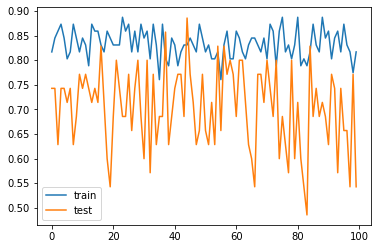

In [35]:
plt.plot(tracc,label='train')
plt.plot(teacc,label='test')
plt.legend()

In [36]:
np.mean(teacc)

0.7037142857142858

In [37]:
np.mean(tracc)

0.8332394366197182

In [38]:
min(teacc)

0.4857142857142857

In [39]:
min(tracc)

0.7605633802816901

In [40]:
np.std(teacc)

0.08118057473488174

(array([ 1.,  5.,  9., 10.,  6., 25., 15., 23.,  4.,  2.]),
 array([0.48571429, 0.52571429, 0.56571429, 0.60571429, 0.64571429,
        0.68571429, 0.72571429, 0.76571429, 0.80571429, 0.84571429,
        0.88571429]),
 <BarContainer object of 10 artists>)

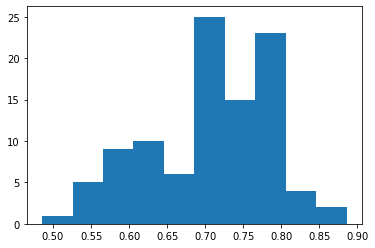

In [41]:
plt.hist(teacc)